In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from numpy import array
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('Dataset.csv')
data.head()

,text,pasal
0,"Pak A sering pegang pegang tangan, kadang pega...",1
1,lama lama dia tarik tanganku baru baring di pa...,1
2,pake jilbab syar'i dan gapernah sentuhan sama ...,0
3,"saya ditarik"" hampir masuk di ruangannya dosen...",1
4,saat mengajar dia mendekati teman saya dengan ...,1


In [3]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StemmerFactory()
stemmer_factory = factory.create_stemmer()
factory = StopWordRemoverFactory()
stopword_factory = factory.create_stop_word_remover()
def preprocessing(word):
    steaming = stemmer_factory.stem(word)
    finish = stopword_factory.remove(steaming)
    return finish

data.text = data.text.map(preprocessing)


In [4]:
x = data['text']
y = data['pasal']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 1000
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(x)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
testing_sequences = tokenizer.texts_to_sequences(X_test)

training_padding = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padding = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padding = np.array(training_padding)
training_labels = np.array(y_train)

testing_padding = np.array(testing_padding)
testing_labels = np.array(y_test)




In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 16)          160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [16]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

num_epochs = 50
history = model.fit(training_padding, training_labels, epochs=num_epochs, batch_size=1,validation_data=(testing_padding, testing_labels), verbose=2)

Epoch 1/50
42/42 - 1s - loss: 0.6387 - accuracy: 0.7143 - val_loss: 0.6470 - val_accuracy: 0.6512 - 1s/epoch - 31ms/step
Epoch 2/50
42/42 - 0s - loss: 0.5945 - accuracy: 0.7381 - val_loss: 0.6522 - val_accuracy: 0.6512 - 258ms/epoch - 6ms/step
Epoch 3/50
42/42 - 0s - loss: 0.5860 - accuracy: 0.7381 - val_loss: 0.6605 - val_accuracy: 0.6512 - 266ms/epoch - 6ms/step
Epoch 4/50
42/42 - 0s - loss: 0.5838 - accuracy: 0.7381 - val_loss: 0.6671 - val_accuracy: 0.6512 - 253ms/epoch - 6ms/step
Epoch 5/50
42/42 - 1s - loss: 0.5843 - accuracy: 0.7381 - val_loss: 0.6624 - val_accuracy: 0.6512 - 625ms/epoch - 15ms/step
Epoch 6/50
42/42 - 0s - loss: 0.5845 - accuracy: 0.7381 - val_loss: 0.6611 - val_accuracy: 0.6512 - 261ms/epoch - 6ms/step
Epoch 7/50
42/42 - 0s - loss: 0.5846 - accuracy: 0.7381 - val_loss: 0.6603 - val_accuracy: 0.6512 - 367ms/epoch - 9ms/step
Epoch 8/50
42/42 - 0s - loss: 0.5844 - accuracy: 0.7381 - val_loss: 0.6660 - val_accuracy: 0.6512 - 311ms/epoch - 7ms/step
Epoch 9/50
42/42 

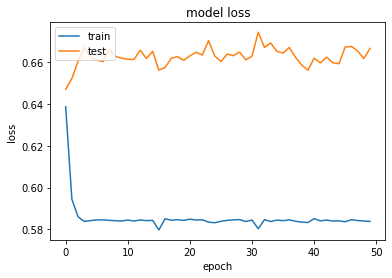

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

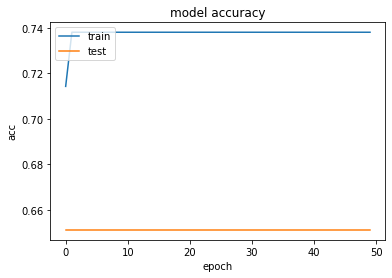

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
sentence =["kemarin aku di kereta ada yang pegang-pegang tangan ku, pas udh lama malah dia makin parah malah pegang-pegang pantat ku"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(np.rint(model.predict(padded)))

[[1.]]


In [43]:
model.save('model.h5')